<div style="text-align: center;">	

# Lecture 3: Conditional Probability and Bayes rule 
## Instructor： 胡传鹏（博士）[Dr. Hu Chuan-Peng]
### 南京师范大学心理学院[School of Psychology, Nanjing Normal University]
 
## Part 2: Parameters (模型参数)
	
</div>


### 概率质量函数 (Probability Mass Function, PMF)

离散随机变量X的概率质量函数被定义为随机变量呈现特定值的概率。


$$ p(x_k)=P[X=x_k] $$


### 概率密度函数 (Probability Density Function, PDF)

随机变量的取值落在某个区域之内的概率则为概率密度函数在这个区域上的积分


$$ f(x)=\sum_{k}^{}p(x_k)\delta(x-x_k)  $$


### 离散概率分布

#### 伯努利分布(Bernoulli distribution)

假设一个事件只有发生或者不发生两种可能，并且这两种可能是固定不变的。那么，如果假设它发生的概率是$p$，那么它不发生的概率就是$q = 1-p$。


伯努利实验就是做一次服从伯努利概率分布的事件，它发生的可能性是$p$，不发生的可能性是$1-p$。

 $$ f(k,p) = p^{k}(1-p)^{1-k} $$

 for $k \in {0, 1} $ $k$ 为可能的结果

如何在Python中观察这种分布？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#从scipy.stats模块加载二项分布、伯努利分布、正态分布、超几何分布、泊松分布、t分布模块
from scipy.stats import binom, bernoulli,norm,hypergeom,poisson,t
#从scipy包加载stats模块
from scipy import stats

ModuleNotFoundError: No module named 'numpy'

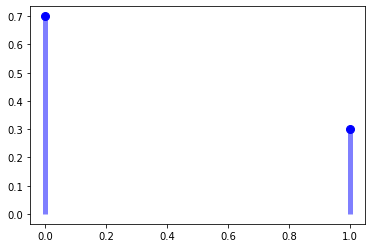

In [2]:
fig, ax = plt.subplots(1, 1)

p = 0.3

# 在参数为0.3的情况下，伯努利分布的平均值m、方差v、峰度s和偏度k
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk') 

x1 = bernoulli.ppf(0.01, p)
x2 = bernoulli.ppf(0.99, p)

ax.plot(x1, bernoulli.pmf(x1, p), 'bo', ms=8, label='bernoulli pmf')

ax.vlines(x1, 0, bernoulli.pmf(x1, p), colors='b', lw=5, alpha=0.5)

ax.plot(x2, bernoulli.pmf(x2, p), 'bo', ms=8, label='bernoulli pmf')

ax.vlines(x2, 0, bernoulli.pmf(x2, p), colors='b', lw=5, alpha=0.5)


plt.show()

#### 二项分布(Binomial distribution)

二项分布是多次伯努利分布实验的概率分布。

以抛硬币举例，在抛硬币事件当中，每一次抛硬币的结果是独立的，并且每次抛硬币正面朝上的概率是恒定的，所以单次抛硬币符合伯努利分布。我们假设硬币正面朝上的概率是p，忽略中间朝上的情况，那么反面朝上的概率是q=(1-p)。我们重复抛n次硬币，其中有k项正面朝上的事件，就是二项分布


<div style="text-align: center;">

##### $$ b(k,n,p) = \binom{k}{n} p^{k}(1-p)^{n-k} $$

</div>

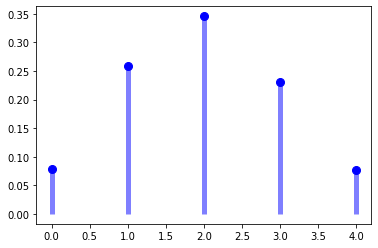

In [3]:
fig, ax = plt.subplots(1, 1)
n, p = 5, 0.4

# 在参数n为5，p为0.4的情况下，伯努利分布的平均值m、方差v、峰度s和偏度k
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')

ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

plt.show()

<div style="text-align: center;">

##### 二项分布(bonimial distribution)，当n取值不同时

</div>

<BarContainer object of 16 artists>

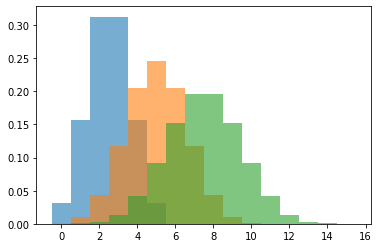

In [7]:
# p=0.5,n=5
p = 0.5
k = np.linspace(0,5,6)
n = 5

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)

# p=0.5, n=10

p = 0.5
k = np.linspace(0,10,11)
n = 10

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)

# p=0.5, n=15

p = 0.5
k = np.linspace(0,15,16)
n = 15

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)


<div style="text-align: center;">

##### 二项分布(bonimial distribution)，当p取值不同时

</div>

<BarContainer object of 11 artists>

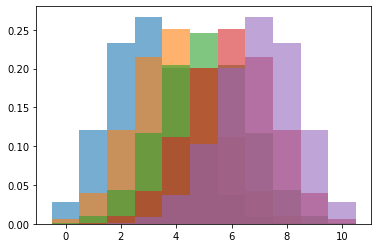

In [8]:
# p = 0.3, n=10
p = 0.3
k = np.linspace(0,10,11)
n = 10

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)


# # p = 0.4, n=10
# p = 0.4
# k = np.linspace(0,10,11)
# n = 10

# prob = binom.pmf(k,n,p)

# plt.bar(k,prob,width=1,alpha=0.6)

# p = 0.5, n=10
p = 0.5
k = np.linspace(0,10,11)
n = 10

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)

# # p = 0.6, n=10
# p = 0.6
# k = np.linspace(0,10,11)
# n = 10

# prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)
p = 0.7
k = np.linspace(0,10,11)
n = 10

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)

### 超几何分布

例如在有$N$个样本，其中$K$个是不及格的。超几何分布描述了在该$N$个样本中抽出 $n$个，其中 $k$个是不及格的机率：

<div style="text-align: center;">

 $$ p(k,n,K,N)=\frac{\binom{K}{k}\binom{N-K}{n-k} }{\binom{N}{n} } $$

 $$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

</div>

假设某医院接收到20位病人，其中7位病人患有心理健康问题。那么，如果我们想知道如果我们从20位病人中中随机选择12位，找到一定数量的患有精神健康问题的病人的概率。

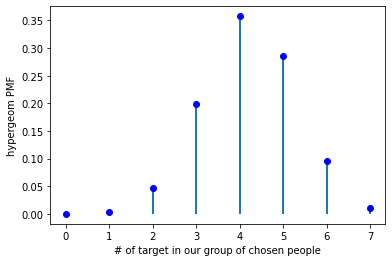

In [10]:
[M, n, N] = [20, 7, 12]

rv = hypergeom(M, n, N)

x = np.arange(0, n+1)

pmf_target = rv.pmf(x)

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(x, pmf_target, 'bo')

ax.vlines(x, 0, pmf_target, lw=2)

ax.set_xlabel('# of target in our group of chosen people')

ax.set_ylabel('hypergeom PMF')

plt.show()

<div style="text-align: center;">

# 泊松分布

</div>

<div style="text-align: center;">

# $$ f(k)=exp(-\mu)\frac{\mu^k}{k!} $$


</div>

某神经元在一段时间内平均放电6次。我们想要知道在下一段同样的时间内，该神经元会放电多少次。

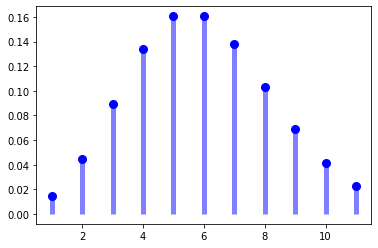

In [11]:
fig, ax = plt.subplots(1, 1)
mu = 6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

plt.show()

### 连续概率分布

#### 二项分布，当n-> $\infty$


In [2]:
p = 0.5
k = np.linspace(0,1000,1001)
n = 1000

prob = binom.pmf(k,n,p)

plt.bar(k,prob,width=1,alpha=0.6)

NameError: name 'np' is not defined

当二项分布的参数你趋近于无穷大时，二项分布近似正态分布

<div style="text-align: center;">

# 正态分布(Normal distribution)

</div>

<div style="text-align: center;">

# $$ x \sim N(\mu, \sigma^2) $$


# $$ f(x) = \frac{1}{\sigma \surd {2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

</div>

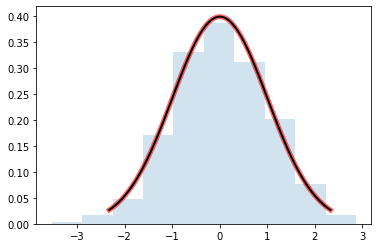

In [13]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')


vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.show()

<div style="text-align: center;">

# 正态分布(Normal distribution)，当$\mu$不同时

</div>

<BarContainer object of 20 artists>

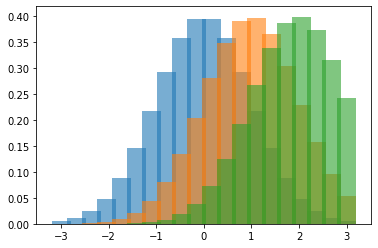

In [20]:
# mu = 0，sigma = 1
x= np.linspace(-3,3,20)
prob=norm.pdf(x,0,1)

plt.bar(x,prob,width=0.4,alpha=0.6)

# mu = 1，sigma = 1
x= np.linspace(-3,3,20)
prob=norm.pdf(x,1,1)

plt.bar(x,prob,width=0.4,alpha=0.6)

# mu = 2，sigma = 1
x= np.linspace(-3,3,20)
prob=norm.pdf(x,2,1)

plt.bar(x,prob,width=0.4,alpha=0.6)

<div style="text-align: center;">

# 正态分布(Normal distribution)，当$\sigma$不同时

</div>

<BarContainer object of 20 artists>

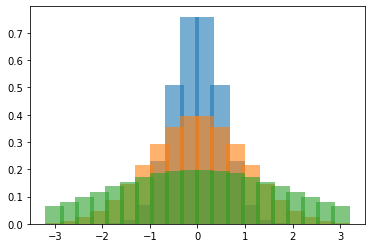

In [21]:
# mu = 0，sigma = 0.5
x= np.linspace(-3,3,20)
prob=norm.pdf(x,0,0.5)

plt.bar(x,prob,width=0.4,alpha=0.6)

# mu = 0，sigma = 1
x= np.linspace(-3,3,20)
prob=norm.pdf(x,0,1)

plt.bar(x,prob,width=0.4,alpha=0.6)

# mu = 0，sigma = 2
x= np.linspace(-3,3,20)
prob=norm.pdf(x,0,2)

plt.bar(x,prob,width=0.4,alpha=0.6)

<div style="text-align: center;">

# t分布

</div>

<div style="text-align: center;">

# $$ f(x,v)=\frac{\Gamma ((v+1)/2)}{\sqrt{\pi v}\gamma(v/2) }(1+x^2/v) ^{-(v+1)/2} $$

</div>

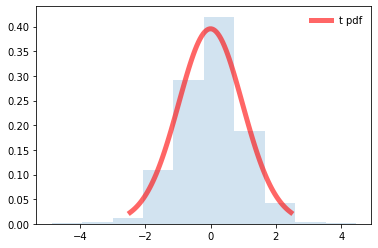

In [16]:
fig, ax = plt.subplots(1, 1)

df = 30

# 在参数为0.3的情况下，伯努利分布的平均值m、方差v、峰度s和偏度k
mean, var, skew, kurt = t.stats(df, moments='mvsk')


x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)

ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')


vals = t.ppf([0.001, 0.5, 0.999], df)
np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df))

r = t.rvs(df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()
